Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:26
🔁 Restarting kernel...


Homework report should include:  
1) scaling plot in log-log coordinates with description; create correct labels for scaling plot, including units of measurement; make comments on operations in cell starting with ##!!!  
2) replicates clusterization for all files (in directory for the lecture) with dendrogram and description;  make comments on operations in cells starting with ##!!!  

In [2]:
%%bash 
pip install cooler
pip install hicrep


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.5 MB/s eta 0:

In [1]:
import matplotlib.pyplot as plt

In [2]:
import cooler

In [3]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [6]:
!gdown 1dtuPlh4PR6kJPmwReRKWcOhAcAx-YyBE

Downloading...
From: https://drive.google.com/uc?id=1dtuPlh4PR6kJPmwReRKWcOhAcAx-YyBE
To: /content/HiC1.dm3.mapq_30.1000.mcool
100% 124M/124M [00:02<00:00, 50.6MB/s]


In [7]:
mcool ='HiC1.dm3.mapq_30.1000.mcool'


In [8]:
resolution = 20000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

Tasks for seminar:   
1) get info and attributes of Hi-C matrix with cooler.info  
2) open cooler object as balanced matrix for intrachromosomal contacts   
3) open cooler as unbalanced matrix for interchromosomal contacts  
4) get table with coordinates and contacts, are they raw or balanced?  
5) get the table in command line with command *cooler dump*  
6) look at the table with bins, which columns present there?  
7) plot a piece of map (log)  
8) scaling plot  (in log - log coordinates)  
9) replicates clusterization



In [9]:
m=clr.matrix(balance=True).fetch('chrX')

In [10]:
pix=clr.pixels(join=True)[:]

In [11]:
bins=clr.bins()[:]

<ipython-input-12-57c1b47ce89e>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')


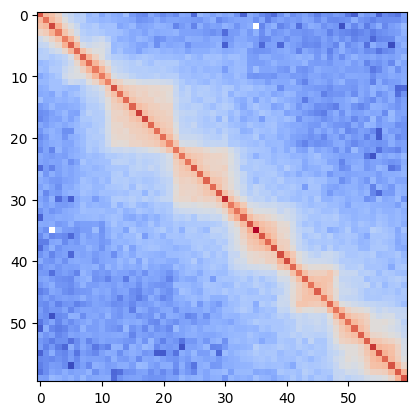

In [12]:
plt.imshow(np.log(m[120:180,120:180]),cmap='coolwarm')

In [13]:
##!!! write comments for each row
z=np.zeros(len(m)) # создаём пустой массив нулей размера |m|
for i in range(len(m)): # для каждой i-ой диагонали
  z[i]=np.nanmean(np.diagonal(m,i)) # добавим в массив среднее число count-ов в диагонали

<ipython-input-13-08370e28c84e>:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i)) # добавим в массив среднее число count-ов в диагонали


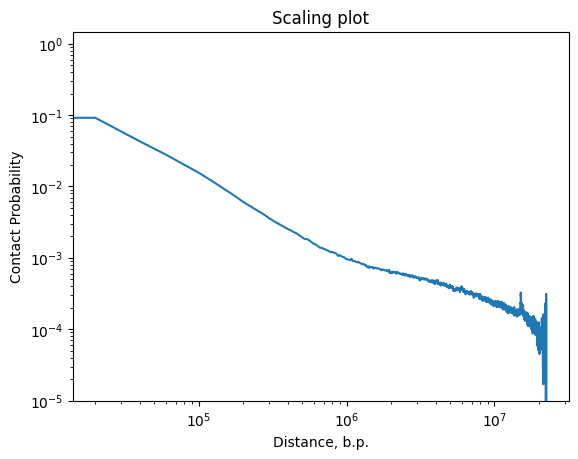

In [16]:
##!!! write comments for each row
##!!! why do we paste 20000 below? 
# 20000 - размер бина матрицы Hi-C. i-ый бин соответствует расстоянию i*20000
plt.plot(np.arange(len(m))*20000,z)
# строим зависимость логарифма среднего числа count-ов диагоналей в зависимости от расстояния между фрагментами
plt.xscale('log') # лог. шкала абсцисс
plt.yscale('log') # лог. шкала ординат

plt.title('Scaling plot') # Заголовок графика
plt.xlabel('Distance, b.p.') # подпись оси абсцисс
plt.ylabel('Contact Probability'); # подпись оси ординат

График показывает частоту (вероятность) контактов между участками в зависимости от расстояния между ними. По оси абсцисс находится расстояние между участками, по оси ординат - частота контактов. Для хороших данных мы ожидаем увидеть плавно спадающий график.

Replicates clusterization with stratum-adjusted correlation coefficient (scc)


We have replicates for 2 *drosophila* cell lines: Bg3 and Kc167.  
Bg3 - nervous cell line (HiC1...., HiC2... files)   
Kc167 - embryonic cell line  (HiC3...., HiC4... files)  
The aim is to conduct replicates clusterization, using scc and demonstrate  that replicates of same cell line tend to be closer to each other comparing with different cell types.    
Hicrep can only calculate scc for each chromosome separately.  
This is why you obtain several values with hicrepSCC function (run code below). The number of the values is equal to the number of chromosomes in cool file. So lets imagine, you take 2 mcool (or cool) files and decide to calculate scc between Hi-C matrices storing in these files only for chromosome 'chr2L', than for 'chr2R', etc. You will obtain as many scc as there are chromosomes in the Hi-C map. This is exactly what hicrepSCC function gives as an output. But then, to get single general scc value for 2 Hi-C maps (2 replicates) you should calculate average value of scc across all the chromosomes.   
So you have an scc (averaged across chrs) for each pair of samples (HiC1-HiC2,HiC1-HiC3,HiC1-HiC4,HiC2-HiC3,HiC2-HiC4,HiC3-HiC4). Now you can use these values as the measure of similarity between each 2 samples and build a dendrogram.  
To do this, you should construct symmetric matrix of similarity from calculated SCCs with ones on the diagonal.
This matrix should be used as an input for 'linkage' function (see below)

In [17]:
!gdown 1dtuPlh4PR6kJPmwReRKWcOhAcAx-YyBE
!gdown 1MPzzTmu3jNymHpLNv9oQkkOQR_r3C1AM

Downloading...
From: https://drive.google.com/uc?id=1dtuPlh4PR6kJPmwReRKWcOhAcAx-YyBE
To: /content/HiC1.dm3.mapq_30.1000.mcool
100% 124M/124M [00:00<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MPzzTmu3jNymHpLNv9oQkkOQR_r3C1AM
To: /content/HiC2.dm3.mapq_30.1000.mcool
100% 127M/127M [00:04<00:00, 28.1MB/s]


In [18]:
!gdown 1hXry50UpQwOkr6kCeLVzL_Qca4o6BwN-
!gdown 1cG2rfyjV0Mx-VO3ftXZSJ6tZG9MJXF7B

Downloading...
From: https://drive.google.com/uc?id=1hXry50UpQwOkr6kCeLVzL_Qca4o6BwN-
To: /content/HiC3.dm3.mapq_30.1000.mcool
100% 104M/104M [00:01<00:00, 54.5MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1cG2rfyjV0Mx-VO3ftXZSJ6tZG9MJXF7B
To: /content/HiC4.dm3.mapq_30.1000.mcool
100% 126M/126M [00:04<00:00, 31.3MB/s]


In [19]:
### the code is for calculation of scc between HiC1.dm3.mapq_30.1000.mcool and HiC2.dm3.mapq_30.1000.mcool
##!!! describe the next four parameter (as comments)
binSize = 20000 # значение размера бина
dBPMax = 5000000 # макс. расстояние, на котором будут учитываться контакты
bDownSample = True # делать ли уменьшение семплирования для несовпадаюищих по размеру образцов
h=0 # параметр для фильтра внутри алгоритма  при работе с матрицами

fmcool1 = 'HiC1.dm3.mapq_30.1000.mcool'
fmcool2 = 'HiC2.dm3.mapq_30.1000.mcool'
cool1, binSize1 = readMcool(fmcool1, binSize)
cool2, binSize2 = readMcool(fmcool2, binSize)
scc=hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)



/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()


In [21]:
scc

array([0.6129397 , 0.5768267 , 0.76475088, 0.5767983 , 0.88104427,
       0.62127888,        nan])

In [31]:
# Now calculate scc for each pair of samples, average across chromosomes and create matrix of similarity

def scc_pairwise(cool1, cool2):
    cool1, binSize1 = readMcool(cool1, binSize)
    cool2, binSize2 = readMcool(cool2, binSize)
    return np.nanmean(hicrepSCC(cool1, cool2, h, dBPMax, bDownSample))


corr_matrix = np.ones((4, 4))
template = 'HiC{}.dm3.mapq_30.1000.mcool'
for i, j in ((0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)):
    val = scc_pairwise(template.format(i+1), template.format(j+1))
    corr_matrix[i][j] = val
    corr_matrix[j][i] = val

corr_matrix

/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in double_scalars
  return 

array([[1.        , 0.67293392, 0.42014761, 0.39182045],
       [0.67293392, 1.        , 0.4242003 , 0.39491033],
       [0.42014761, 0.4242003 , 1.        , 0.65523491],
       [0.39182045, 0.39491033, 0.65523491, 1.        ]])

<Axes: >

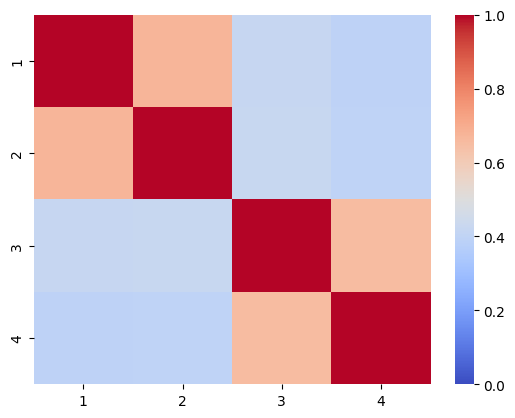

In [36]:
import seaborn as sns

sns.heatmap(corr_matrix, cmap="coolwarm", xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4], vmin=0)

как можно видеть, первые два образца коррелириуют между собой, как и два последних. Первые два слабо коррелируют с последними двумя.

In [ ]:
## A piece of code for the dendrogram generation

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.45007397803361926, 0.45007397803361926, 0.0],
  [0.0, 0.5049415804235364, 0.5049415804235364, 0.0],
  [0.45007397803361926,
   1.7279985591740132,
   1.7279985591740132,
   0.5049415804235364]],
 'ivl': ['HiC1 (Bg3)', 'HiC2 (Bg3)', 'HiC3 (Kc167)', 'HiC4 (Kc167)'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0']}

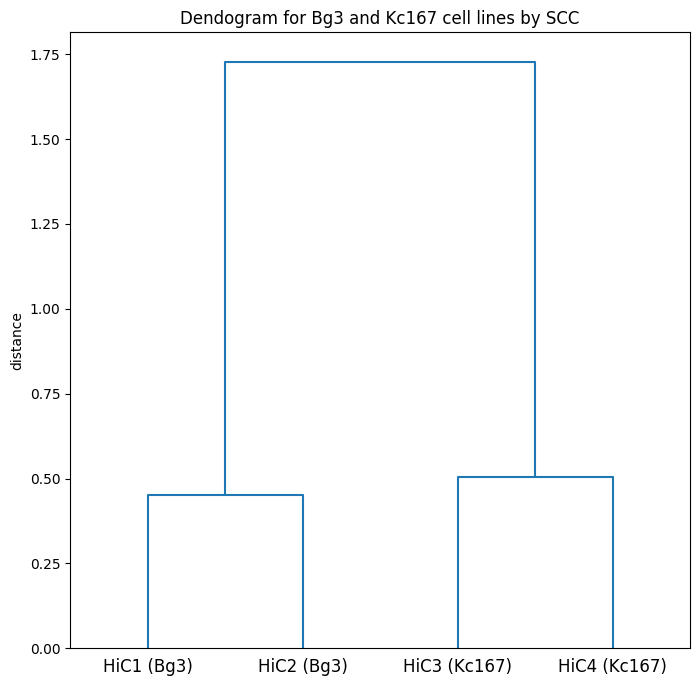

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram


Z=linkage(corr_matrix, 'single', 'correlation')
plt.figure(figsize=(8,8))
plt.ylabel('distance')

plt.title('Dendogram for Bg3 and Kc167 cell lines by SCC')
dendrogram(Z, color_threshold=0, labels=['HiC1 (Bg3)', 'HiC2 (Bg3)', 'HiC3 (Kc167)', 'HiC4 (Kc167)'])

